In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.shape

(81, 4)

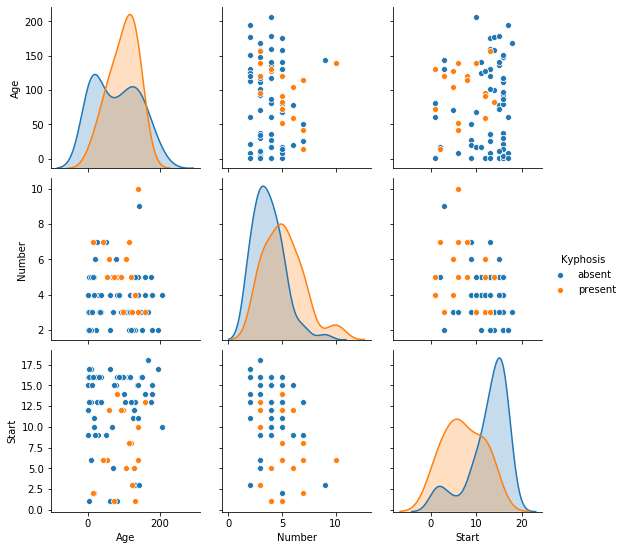

In [5]:
sns.pairplot(data, hue='Kyphosis')

In [6]:
#Spliting the data set into input and output

X = data.iloc[:, 1:]
X= data.drop('Kyphosis', axis=1)
y= data.Kyphosis

In [7]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
#Apply the decison tree alggorithm
from sklearn.tree import DecisionTreeClassifier

#Initialization of object
dtree = DecisionTreeClassifier(criterion = 'entropy')

#Applying the classifier to the dataset
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

dtree.fit(X, y) #Model will be biult on all the 81 records--> but if I want to test the performance
of the model, I need some data to test

Accuracy--98%

New data point--> 50%

dtree.fit(X, y)-->prediction I took a single row, on some number of rows

In [10]:
#Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [15]:
#Classification report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [16]:
confusion_matrix(y_train, y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [19]:
#Prediction on test data(unseen data)
#Syntax: objectname.predict(Inputvalues)
y_test_pred = dtree.predict(X_test)#corressponding output of X_test is stored in y_test
#Compare the actual y_test values with model predicted values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



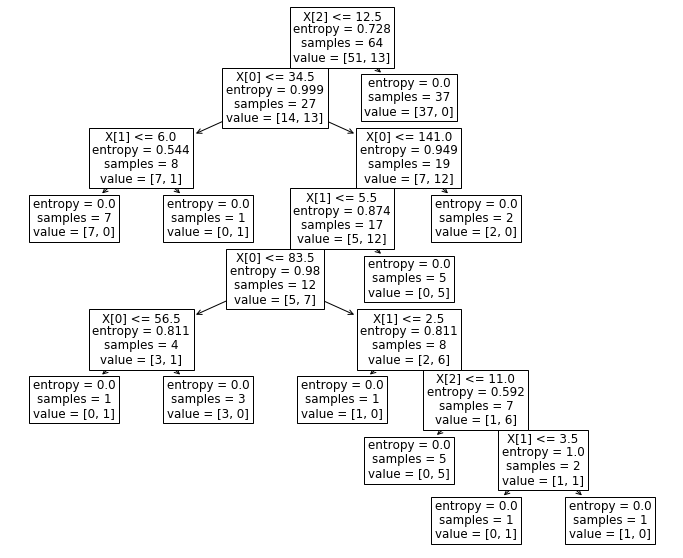

In [22]:
#Visualization of the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

In [25]:
#KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv=5)

array([0.78571429, 0.76923077, 0.92307692, 0.75      , 0.75      ])

In [26]:
#Splitting if we dirctly biuld the mode--> we will not able to test 

In [30]:
#hyperparameters
#GridsearchCV--> find optimum parametrs
grid_param = {'criterion' : ['gini', 'entropy'],
             'max_depth' : range(2, 10, 1),
             'min_samples_leaf' : range(1,10,1)}

In [31]:
#initialization
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param)

#applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

D:\Users\kc\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\kc\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                 

In [32]:
#return the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}

In [35]:
#we have to build the model with best parameters
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, min_samples_leaf= 1)

#we need to fit the model to the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
#Prediction on test data
pred_test = clf.predict(X_test)

#Classification repport of actual and predicted values(Gridsearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17

